In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./cancer_patient.csv')
df.drop(['index', 'Patient Id'], axis=1, inplace=True)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [3]:
sns.set_palette("Set3")
from matplotlib import style
style.use("ggplot")

In [4]:
df.Level = df.Level.replace('Low', 0)
df.Level = df.Level.replace('Medium', 1)
df.Level = df.Level.replace('High', 2)
df.Level = df.Level.astype('int64')

X = df.drop('Level', axis=1)
y = pd.get_dummies(df['Level'])


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(8, activation = "relu", input_dim = X.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(X, y, epochs = 40, validation_split = 0.3)

Epoch 1/40
22/22 [==============================] - 1s 21ms/step - loss: 2.3962 - accuracy: 0.3386 - val_loss: 1.6932 - val_accuracy: 0.3100
Epoch 2/40
22/22 [==============================] - 0s 4ms/step - loss: 1.4872 - accuracy: 0.3271 - val_loss: 1.2075 - val_accuracy: 0.3500
Epoch 3/40
22/22 [==============================] - 0s 6ms/step - loss: 1.1736 - accuracy: 0.3786 - val_loss: 1.0769 - val_accuracy: 0.4533
Epoch 4/40
22/22 [==============================] - 0s 5ms/step - loss: 1.0909 - accuracy: 0.4229 - val_loss: 1.0249 - val_accuracy: 0.5133
Epoch 5/40
22/22 [==============================] - 0s 6ms/step - loss: 1.0700 - accuracy: 0.4400 - val_loss: 0.9648 - val_accuracy: 0.5333
Epoch 6/40
22/22 [==============================] - 0s 5ms/step - loss: 1.0157 - accuracy: 0.4643 - val_loss: 0.9121 - val_accuracy: 0.5500
Epoch 7/40
22/22 [==============================] - 0s 5ms/step - loss: 0.9394 - accuracy: 0.5414 - val_loss: 0.8460 - val_accuracy: 0.6333
Epoch 8/40
22/22 [=

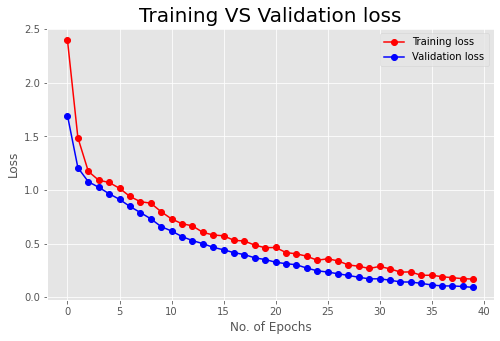

In [7]:
plt.figure(figsize = (8,5))
plt.plot(history.history["loss"], color = "r", label= "Training loss", marker = "o")
plt.plot(history.history["val_loss"], color = "b", label= "Validation loss", marker = "o")
plt.title("Training VS Validation loss", fontsize = 20)
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig('./images/training_vs_validation.png')
plt.show()

### Checking accuracies in the model

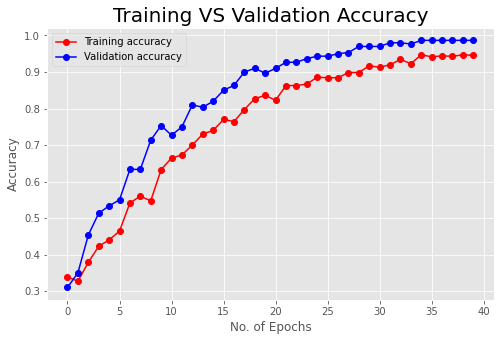

In [8]:
plt.figure(figsize = (8,5))
plt.plot(history.history["accuracy"], color = "r", label = "Training accuracy", marker = "o")
plt.plot(history.history["val_accuracy"], color = "b", label = "Validation accuracy", marker = "o")
plt.title("Training VS Validation Accuracy", fontsize = 20)
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('./images/accuracy.png')
plt.show()